### Import Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
import joblib


### Load Dataset

In [47]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Inspection

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [49]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### Target Variable Analysis (Class Imbalance)

In [50]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [51]:
fraud_ratio = df['Class'].value_counts(normalize=True)
fraud_ratio


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

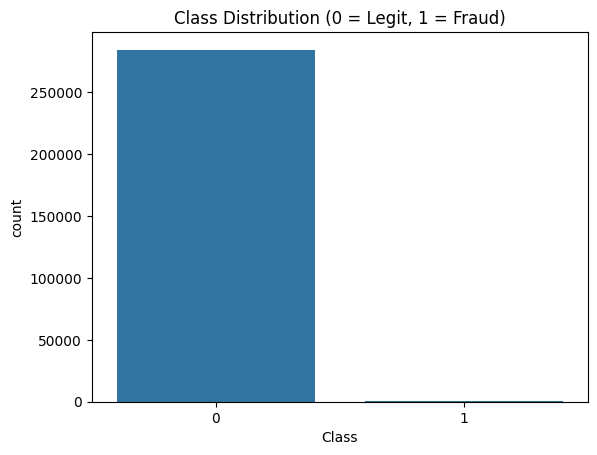

In [52]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()


##### Missing Data Handling

In [53]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### Duplicate Records Check

In [54]:
df.duplicated().sum()


1081

In [55]:
df = df.drop_duplicates()


In [56]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Statistical Summary & Skewness

In [57]:
df[numerical_features].skew().sort_values(ascending=False)


Class     24.430545
Amount    16.978803
V28       11.555115
V7         2.890271
V21        2.820033
V6         1.829880
V10        1.252967
V4         0.671504
V26        0.580292
V9         0.537663
V11        0.344074
V19        0.108312
V13        0.064293
Time      -0.035581
V22       -0.182330
V18       -0.248661
V15       -0.309659
V25       -0.415744
V24       -0.552129
V27       -0.753804
V16       -1.051161
V14       -1.918804
V20       -2.043121
V3        -2.151984
V12       -2.199008
V5        -2.414079
V1        -3.273271
V17       -3.690497
V2        -4.695162
V23       -5.867221
V8        -8.310970
dtype: float64

##### Outlier Analysis

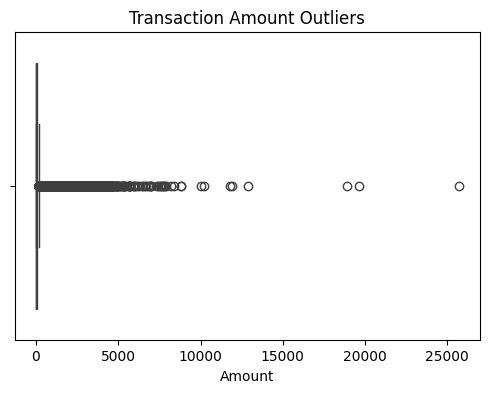

In [58]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Amount'])
plt.title("Transaction Amount Outliers")
plt.show()


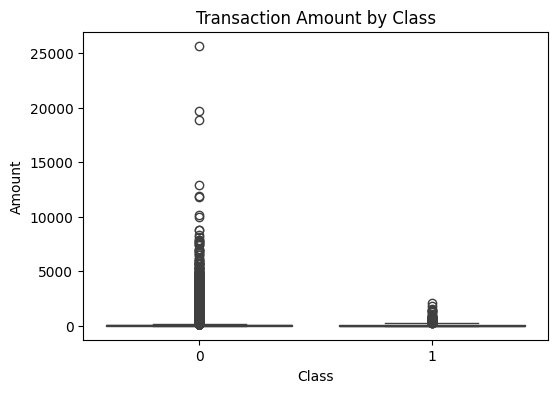

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount by Class")
plt.show()


##### Feature Distribution: Fraud vs Non-Fraud

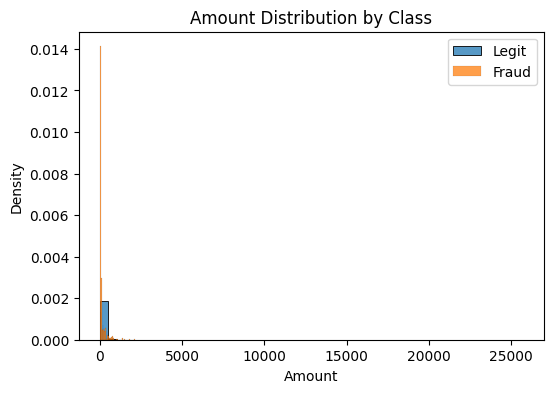

In [60]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['Class']==0]['Amount'], bins=50, label='Legit', stat='density')
sns.histplot(df[df['Class']==1]['Amount'], bins=50, label='Fraud', stat='density')
plt.legend()
plt.title("Amount Distribution by Class")
plt.show()


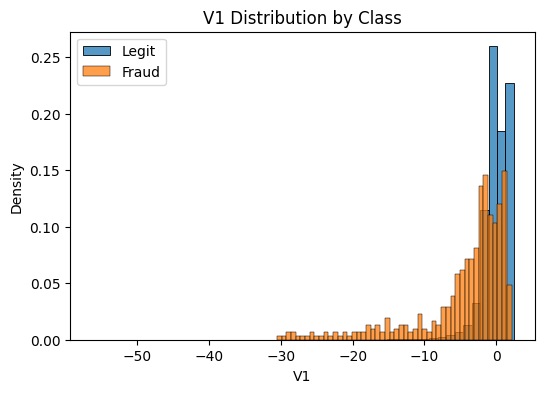

In [61]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['Class']==0]['V1'], bins=50, label='Legit', stat='density')
sns.histplot(df[df['Class']==1]['V1'], bins=50, label='Fraud', stat='density')
plt.legend()
plt.title("V1 Distribution by Class")
plt.show()


##### Time Feature Analysis

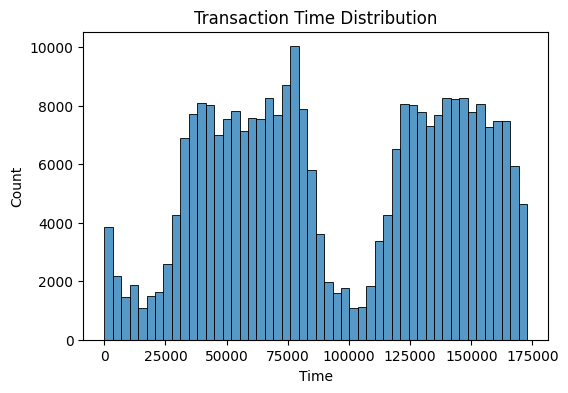

In [62]:
plt.figure(figsize=(6,4))
sns.histplot(df['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.show()


##### Correlation Analysis

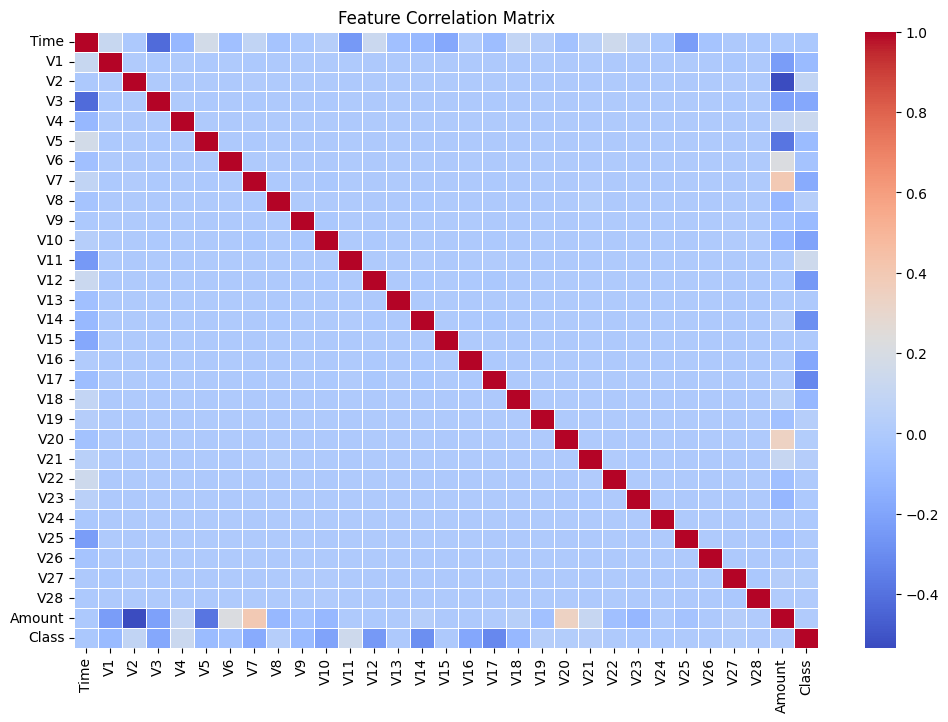

In [63]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


##### Scaling Decision

In [64]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit_transform(df[['Amount', 'Time']])


In [65]:
# joblib.dump(scaler, "standard_scaler.pkl")


#### Train-Test Split

In [66]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [67]:
scaler = StandardScaler()
scaler.fit(X_train[['Amount', 'Time']])

StandardScaler()

In [68]:
X_train[['Amount', 'Time']] = scaler.transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

In [69]:
joblib.dump(scaler, "standard_scaler.pkl")

['standard_scaler.pkl']

##### Handle Class Imbalance( Only Traning Data)

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [71]:
y_train_resampled.value_counts()


Class
0    226602
1    226602
Name: count, dtype: int64

• Dataset is highly imbalanced with only 0.17% fraudulent transactions.

• No missing values or duplicate anomalies observed.

• Transaction Amount and Time show skewed distributions.

• Certain anonymized features show strong separation between fraud and non-fraud.

• SMOTE selected to address class imbalance during training.


### Modeling

#### Linear Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

In [73]:
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [74]:
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [75]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Results")
print("Accuracy: ",accuracy_lr)
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))



Logistic Regression Results
Accuracy:  0.9737073978782645
ROC-AUC: 0.9619658314202657
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



#### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


In [79]:
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_jobs=-1,
                       random_state=42)

In [80]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [82]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [83]:
print("Random Forest Results")
print("Accuracy: ",accuracy_rf)
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy:  0.9991188806259472
ROC-AUC: 0.9796000256417641
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.72      0.78      0.75        95

    accuracy                           1.00     56746
   macro avg       0.86      0.89      0.87     56746
weighted avg       1.00      1.00      1.00     56746



In [84]:
from xgboost import XGBClassifier

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    random_state=42
)

In [85]:
xgb.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [86]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [87]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Results")
print("Accuracy: ",accuracy_xgb)
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Results
Accuracy:  0.9916117435590174
ROC-AUC: 0.9537917758686845
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.15      0.82      0.25        95

    accuracy                           0.99     56746
   macro avg       0.57      0.91      0.62     56746
weighted avg       1.00      0.99      0.99     56746



In [88]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [accuracy_lr, accuracy_rf, accuracy_xgb]
})

print(results)


                 Model  Accuracy
0  Logistic Regression  0.973707
1        Random Forest  0.999119
2              XGBoost  0.991612


In [89]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [90]:
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]


In [91]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)


In [92]:
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)


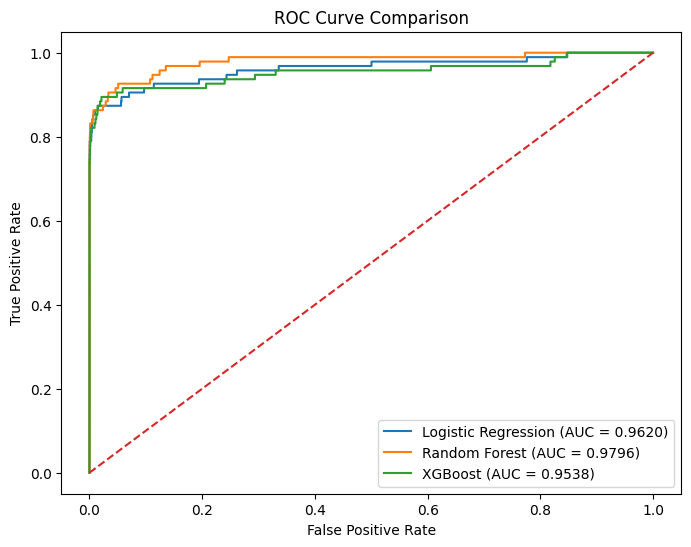

In [93]:
plt.figure(figsize=(8,6))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [94]:
auc_scores = {
    "Logistic Regression": auc_lr,
    "Random Forest": auc_rf,
    "XGBoost": auc_xgb
}

best_model = max(auc_scores, key=auc_scores.get)

print("ROC-AUC Scores:")
for model, score in auc_scores.items():
    print(f"{model}: {score:.4f}")

print("\nBest Model Based on ROC-AUC:", best_model)


ROC-AUC Scores:
Logistic Regression: 0.9620
Random Forest: 0.9796
XGBoost: 0.9538

Best Model Based on ROC-AUC: Random Forest


In [95]:
best_model_obj = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb
}[best_model]

joblib.dump(
    {
        "model": best_model_obj,
        "scaler": scaler
    },
    "fraud_model_bundle.pkl"
)

print(f"Saved best model: {best_model}")


Saved best model: Random Forest


In [ ]:
import pandas as pd

## Legiyimate Transaction ( Class =0 )

new_transaction = pd.DataFrame([{
    "Time": 45000,
    "V1": -1.359807,
    "V2": -0.072781,
    "V3": 2.536347,
    "V4": 1.378155,
    "V5": -0.338321,
    "V6": 0.462388,
    "V7": 0.239599,
    "V8": 0.098698,
    "V9": 0.363787,
    "V10": 0.090794,
    "V11": -0.551600,
    "V12": -0.617801,
    "V13": -0.991390,
    "V14": -0.311169,
    "V15": 1.468177,
    "V16": -0.470401,
    "V17": 0.207971,
    "V18": 0.025791,
    "V19": 0.403993,
    "V20": 0.251412,
    "V21": -0.018307,
    "V22": 0.277838,
    "V23": -0.110474,
    "V24": 0.066928,
    "V25": 0.128539,
    "V26": -0.189115,
    "V27": 0.133558,
    "V28": -0.021053,
    "Amount": 149.62
}])


In [97]:
bundle = joblib.load("fraud_model_bundle.pkl")
model = bundle["model"]
scaler = bundle["scaler"]

new_transaction[['Amount', 'Time']] = scaler.transform(
    new_transaction[['Amount', 'Time']]
)

prediction = model.predict(new_transaction)[0]
probability = model.predict_proba(new_transaction)[0][1]

print("Prediction:", "Fraud" if prediction == 1 else "Legitimate")
print("Fraud Probability:", probability)


Prediction: Legitimate
Fraud Probability: 0.05450452623134299


In [102]:
fraud_transaction = pd.DataFrame([{
    "Time": 69000,
    "V1": -4.132456,
    "V2": 3.456789,
    "V3": -6.789123,
    "V4": 4.234567,
    "V5": -3.456789,
    "V6": -1.234567,
    "V7": -5.678912,
    "V8": 2.345678,
    "V9": -4.567891,
    "V10": -6.123456,
    "V11": 5.345678,
    "V12": -7.234567,
    "V13": -0.234567,
    "V14": -8.345678,
    "V15": -1.345678,
    "V16": -5.456789,
    "V17": -9.567891,
    "V18": -3.456789,
    "V19": 1.234567,
    "V20": 3.456789,
    "V21": 1.567891,
    "V22": -1.234567,
    "V23": -2.345678,
    "V24": 0.123456,
    "V25": -1.567891,
    "V26": -0.345678,
    "V27": 0.456789,
    "V28": -0.678912,
    "Amount": 1899.99
}])


In [100]:
legitimate_transaction = pd.DataFrame([{
    "Time": 38000,
    "V1": 0.235512,
    "V2": -0.120345,
    "V3": 1.452378,
    "V4": 0.234512,
    "V5": -0.198234,
    "V6": 0.345123,
    "V7": 0.112345,
    "V8": -0.034512,
    "V9": 0.456712,
    "V10": -0.145234,
    "V11": 0.234512,
    "V12": -0.198234,
    "V13": 0.345612,
    "V14": -0.123451,
    "V15": 0.678912,
    "V16": -0.234512,
    "V17": 0.156789,
    "V18": -0.034512,
    "V19": 0.245678,
    "V20": -0.034512,
    "V21": 0.045612,
    "V22": 0.234567,
    "V23": -0.012345,
    "V24": 0.156789,
    "V25": 0.234512,
    "V26": -0.045612,
    "V27": 0.034512,
    "V28": -0.012345,
    "Amount": 42.75
}])


In [103]:
bundle = joblib.load("fraud_model_bundle.pkl")
model = bundle["model"]
scaler = bundle["scaler"]

for name, tx in [("Legit", legitimate_transaction), ("Fraud", fraud_transaction)]:
    tx = tx[X_train.columns]
    tx[['Amount', 'Time']] = scaler.transform(tx[['Amount', 'Time']])

    pred = model.predict(tx)[0]
    prob = model.predict_proba(tx)[0][1]

    print(f"\n{name} Transaction")
    print("Prediction:", "Fraud" if pred == 1 else "Legitimate")
    print("Fraud Probability:", round(prob, 4))



Legit Transaction
Prediction: Legitimate
Fraud Probability: 0.0183

Fraud Transaction
Prediction: Fraud
Fraud Probability: 0.9196
